In [182]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
# adding new columns to the female table threw SettingWithCopyWarning, feel free to debug if you have ideas


In [158]:
#import male data, was aggregated into singular csv in Excel
prelim_male = pd.read_csv('maledata.csv')
male = prelim_male[["Category", "September", "October", "November", "December", "January", 
                    "February"]].drop(np.arange(9,27))

In [159]:
#import female data, was aggregated into singular csv in Excel
prelim_female = pd.read_csv('femaledata.csv')
female = prelim_female[["Category", "September", "October", "November", "December", "January", 
                    "February"]]

In [163]:
def sum_rows(tbl):
    #function outputs an array with the sums of each row in the table
    output = np.array([])
    for index, row in tbl.iterrows():
        output = np.append(output, sum(tbl.drop(labels = 'Category', axis = 1).loc[index].to_numpy()))
    return output

#applying sum_rows for Male and Female tables to calculate proportions later
female_totals = sum_rows(female)
male_totals = sum_rows(male)
total_populations = female_totals + male_totals

In [180]:
#february proportions were calculated as "endpoint" for values that don't make sense to cumulatively sum, i.e. Users
feb_male = male[['February']].to_numpy()
feb_female = female[['February']].to_numpy()
feb_total = feb_prop_male + feb_prop_female

male['February Proportion'] = feb_male / feb_total
female['February Proportion'] = feb_female / feb_total

#cumulative sum, more useful for looking at long-term, i.e. Total New Users, Male and Female Proportions
male_prop = male_totals / total_populations
female_prop = female_totals / total_populations
male['Total Proportion'] =  male_prop
female['Total Proportion'] = female_prop

In [165]:
male

,Category,September,October,November,December,January,February,February Proportion,Total Proportion
0,Users,59459.000,82922.000,62381.000,59422.000,46154.000,53649.000,0.506974,0.532280
1,New Users,48612.000,70692.000,50324.000,48222.000,36582.000,43550.000,0.498455,0.525390
2,Sessions,92758.000,127248.000,99644.000,100990.000,75742.000,87087.000,0.511635,0.541238
3,Bounce Rate,0.097,0.165,0.117,0.108,0.125,0.087,0.472826,0.474542
4,Pages / Session,4.360,4.520,4.670,5.080,4.860,4.790,0.478521,0.484412
5,Avg. Session Duration,205.180,215.380,225.940,243.630,231.930,232.280,0.465277,0.475845
6,Transactions,10924.000,16392.000,12755.000,17779.000,10398.000,12480.000,0.493905,0.526828
7,Revenue,1020918.060,1411774.090,1243819.480,1755989.740,1128808.500,1166967.180,0.570195,0.597410
8,Ecommerce Conversion Rate,0.118,0.129,0.128,0.176,0.137,0.143,0.481481,0.484831


In [166]:
female

,Category,September,October,November,December,January,February,February Proportion,Total Proportion
0,Users,59083.000,66894.000,45879.000,53174.000,42636.000,52173.000,0.493026,0.467720
1,New Users,50162.000,57364.000,38547.000,44600.000,34688.000,43820.000,0.501545,0.474610
2,Sessions,87013.000,100391.000,70394.000,85311.000,68323.000,83126.000,0.488365,0.458762
3,Bounce Rate,0.107,0.182,0.136,0.125,0.127,0.097,0.527174,0.525458
4,Pages / Session,4.390,4.600,4.900,5.640,5.350,5.220,0.521479,0.515588
5,Avg. Session Duration,208.430,227.620,237.770,278.840,272.230,266.950,0.534723,0.524155
6,Transactions,10240.000,12924.000,9696.000,16589.000,10269.000,12788.000,0.506095,0.473172
7,Revenue,730167.280,860142.520,706719.190,1283579.990,747772.340,879641.820,0.429805,0.402590
8,Ecommerce Conversion Rate,0.118,0.129,0.138,0.194,0.150,0.154,0.518519,0.515169


In [181]:
#copies of male and female tables without extra calculated values; done for plotting
male_plotting = male.drop(labels = ['February Proportion', 'Total Proportion'], axis = 1)
female_plotting = female.drop(labels = ['February Proportion', 'Total Proportion'], axis = 1)

In [176]:
y_male_data_1 = male_plotting.drop(labels = "Category", axis = 1).iloc[1].to_numpy().astype(np.float)

In [177]:
months = ['September', 'October', 'November', 'December', 'January', 'Feb']
x_data = np.arange(0, 6, 1)

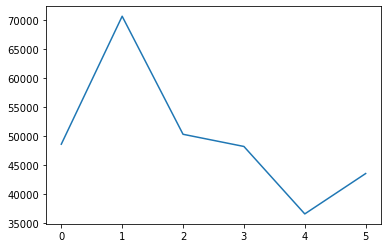

In [178]:
plt.plot(x_data, y_male_data_1)